In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

**Data Exploration**

In [74]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**GOAL:** Looking to predict the median house value

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**TASK:** Need fo fix the missing non-null values. dropna() takes the non-null values, drops them and saves the result back in the data object.

In [76]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Split the Data into training and testing sets.

In [78]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 0.2 is the standard

In [80]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,NEAR OCEAN,145800.0
11588,-118.01,33.78,19.0,2648.0,478.0,1160.0,452.0,5.9357,<1H OCEAN,207400.0
14816,-117.18,32.70,42.0,1691.0,286.0,761.0,281.0,5.1386,NEAR OCEAN,404500.0
3964,-118.58,34.20,21.0,2979.0,744.0,1824.0,692.0,3.5000,<1H OCEAN,223700.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,283500.0
...,...,...,...,...,...,...,...,...,...,...
11700,-117.97,33.88,9.0,1344.0,279.0,530.0,265.0,5.0731,<1H OCEAN,185100.0
9629,-121.00,37.25,31.0,1923.0,341.0,806.0,349.0,3.1738,INLAND,97600.0
8452,-118.35,33.91,26.0,2159.0,523.0,1331.0,520.0,3.8700,<1H OCEAN,264500.0
8766,-118.38,33.81,39.0,2400.0,373.0,877.0,372.0,5.7361,NEAR OCEAN,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

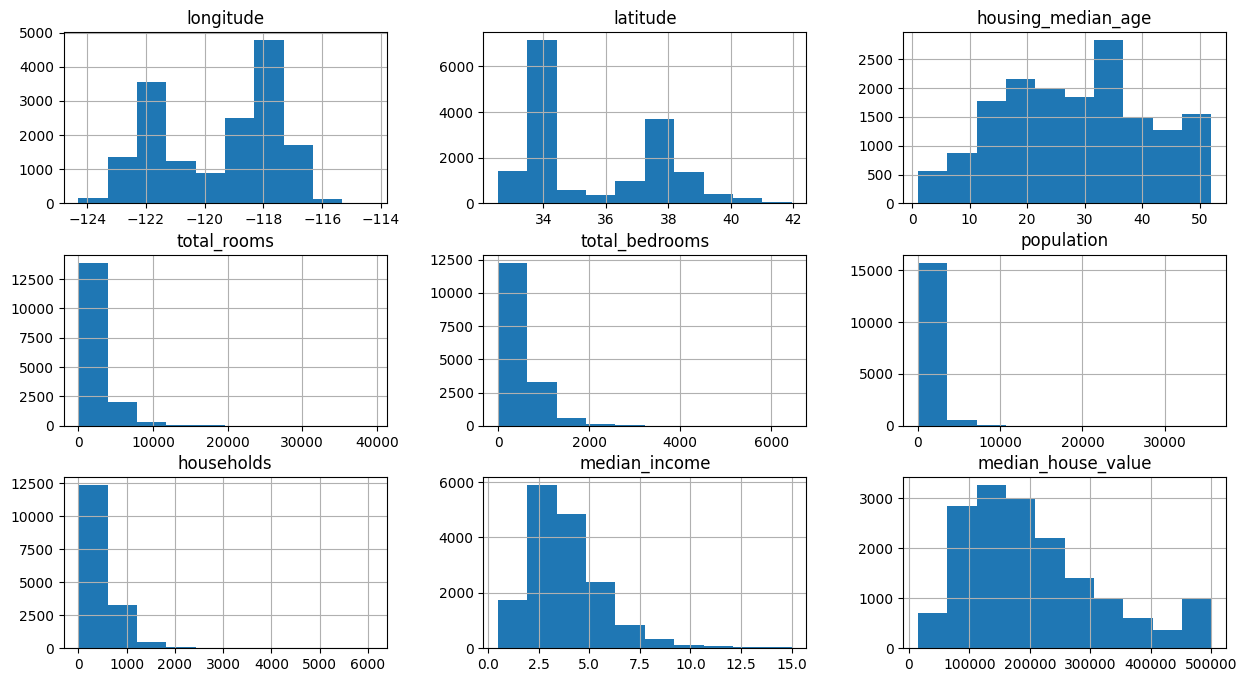

In [81]:
train_data.hist(figsize=(15, 8))

**VISUAL:** Histogram for distribution of features and correlation with the target variable.

In [82]:
numeric_train_data = train_data.select_dtypes(include=['float64', 'int64']) # Remove non-numeric data
numeric_train_data.corr()   # Correlation matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924808,-0.103211,0.055601,0.080028,0.109293,0.066213,-0.015584,-0.043677
latitude,-0.924808,1.000000,0.005079,-0.043865,-0.074298,-0.114621,-0.078595,-0.077906,-0.145058
housing_median_age,-0.103211,0.005079,1.000000,-0.362116,-0.322501,-0.296939,-0.304885,-0.113295,0.110485
total_rooms,0.055601,-0.043865,-0.362116,1.000000,0.931712,0.857905,0.919114,0.189962,0.129290
total_bedrooms,0.080028,-0.074298,-0.322501,0.931712,1.000000,0.877557,0.978620,-0.012393,0.046337
population,0.109293,-0.114621,-0.296939,0.857905,0.877557,1.000000,0.908276,-0.000161,-0.026952
households,0.066213,-0.078595,-0.304885,0.919114,0.978620,0.908276,1.000000,0.007718,0.061966
median_income,-0.015584,-0.077906,-0.113295,0.189962,-0.012393,-0.000161,0.007718,1.000000,0.687750
median_house_value,-0.043677,-0.145058,0.110485,0.129290,0.046337,-0.026952,0.061966,0.687750,1.000000


<Axes: >

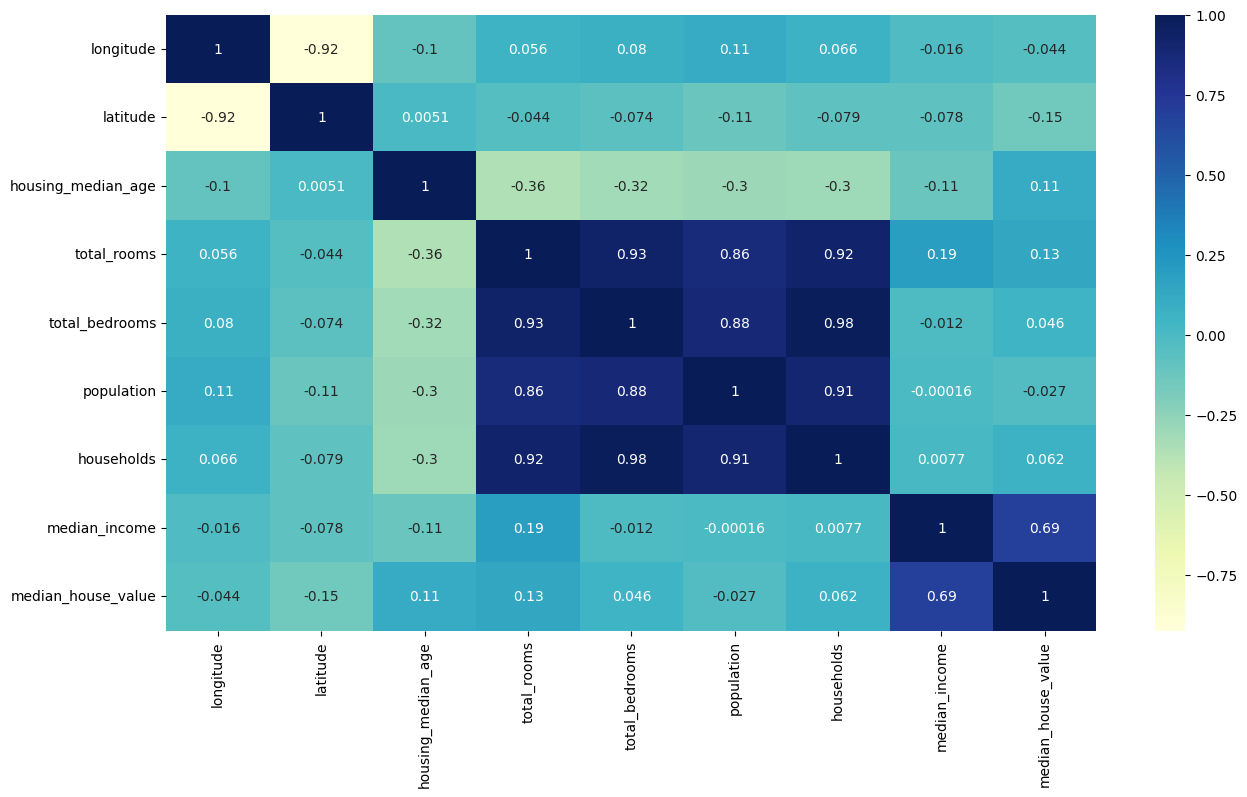

In [83]:
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_train_data.corr(), annot=True, cmap='YlGnBu')

Visualize a correlation matrix

Median income correlates well with target variable median house value. Latitude is negatively correlated.

---

**Data Preprocessing**

Data is skewed, so take the lograthim of those features to see what the distrubution looks like.

In [84]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

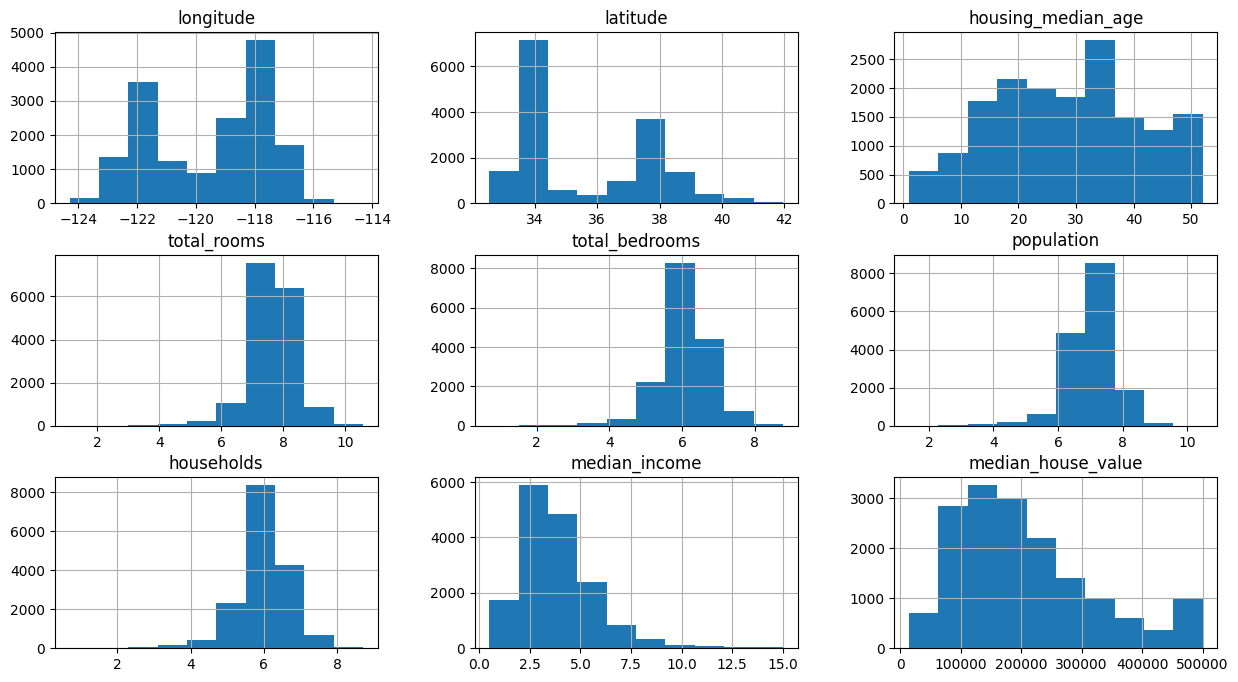

In [85]:
train_data.hist(figsize=(15, 8))

**TASK:** Get data that looks more like a gaussian bell curve; **Normally Distributed**.

We now want to re-include the non-numerical data ocean_proximity as it could be useful.

In [86]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5186
NEAR OCEAN    2106
NEAR BAY      1777
ISLAND           3
Name: count, dtype: int64

This will be done using one-hot encoding

In [87]:
pd.get_dummies(train_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9457,0,0,0,0,1
11588,1,0,0,0,0
14816,0,0,0,0,1
3964,1,0,0,0,0
860,1,0,0,0,0
...,...,...,...,...,...
11700,1,0,0,0,0
9629,0,1,0,0,0
8452,1,0,0,0,0
8766,0,0,0,0,1


In [88]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [89]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9457,-123.84,39.83,19.0,7.287561,5.831882,6.246107,5.429346,1.5278,145800.0,0,0,0,0,1
11588,-118.01,33.78,19.0,7.881937,6.171701,7.057037,6.115892,5.9357,207400.0,1,0,0,0,0
14816,-117.18,32.70,42.0,7.433667,5.659482,6.635947,5.641907,5.1386,404500.0,0,0,0,0,1
3964,-118.58,34.20,21.0,7.999679,6.613384,7.509335,6.541030,3.5000,223700.0,1,0,0,0,0
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,283500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11700,-117.97,33.88,9.0,7.204149,5.634790,6.274762,5.583496,5.0731,185100.0,1,0,0,0,0
9629,-121.00,37.25,31.0,7.562162,5.834811,6.693324,5.857933,3.1738,97600.0,0,1,0,0,0
8452,-118.35,33.91,26.0,7.677864,6.261492,7.194437,6.255750,3.8700,264500.0,1,0,0,0,0
8766,-118.38,33.81,39.0,7.783641,5.924256,6.777647,5.921578,5.7361,500001.0,0,0,0,0,1


<Axes: >

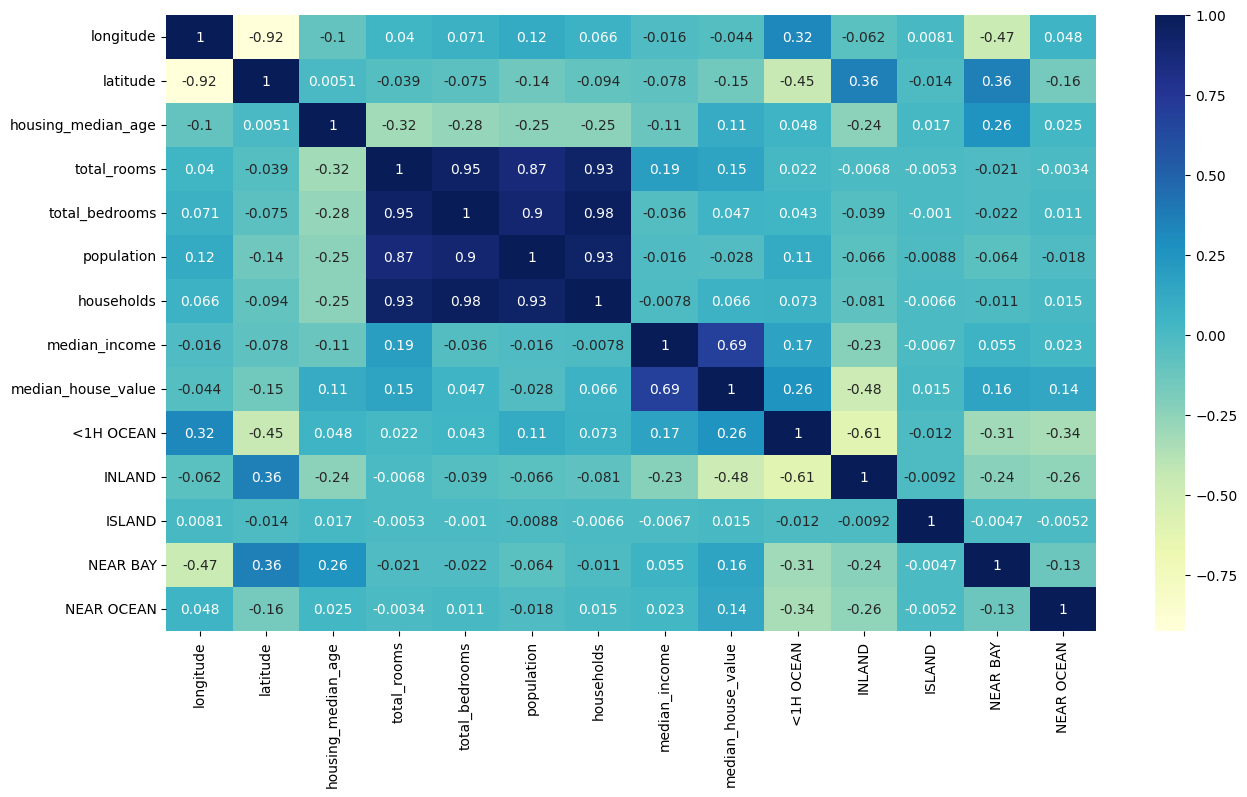

In [90]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

Now we can see how the new features correlate with the data. For examples median house value has a negative correlation with inland, meaning you pay less if the house is inland. The opposite is true is you are <1hr from the ocean.

<Axes: xlabel='latitude', ylabel='longitude'>

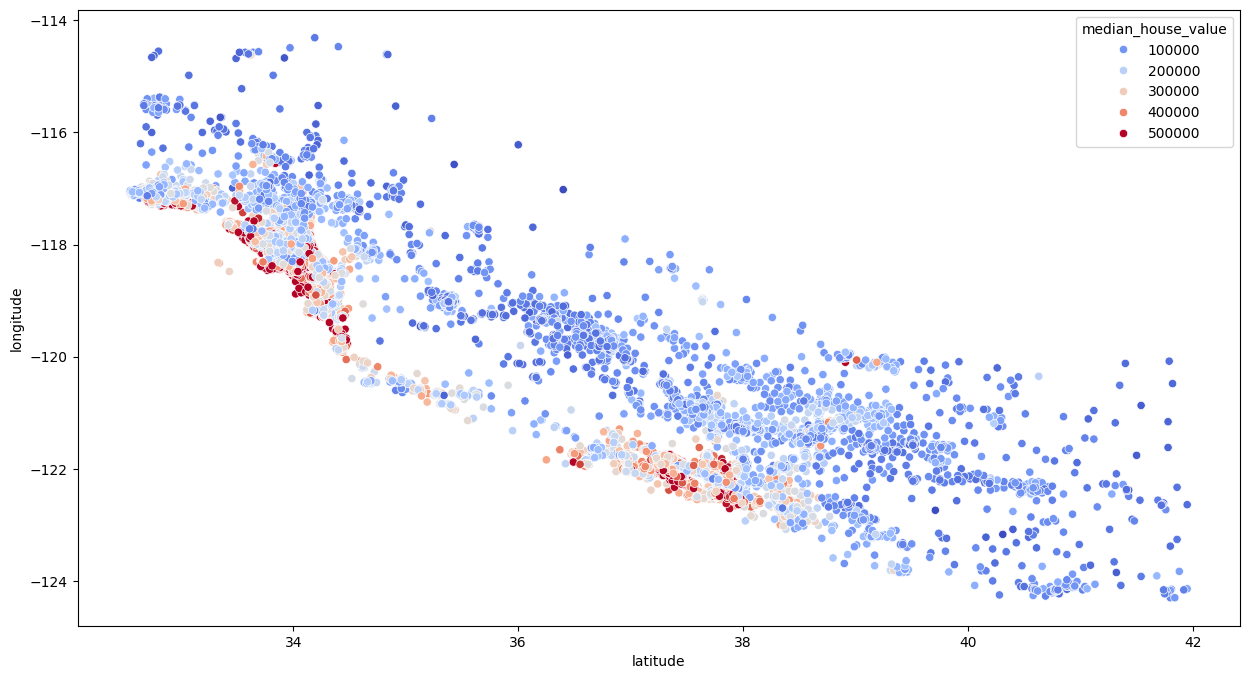

In [91]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

Median House Value: The more red it is the more expensive, the more blue it is the less expensive.

For visualization, the closer to the origin, the closer to the coast the house is located. 

---

**Feature Engineering**

We have features that are interesting on their own, but we can combine them into more interesting features. 

In [92]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

This results in the number of bedrooms per room, so how many bedrooms per room there are.

In [93]:
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

Also say you have a block with many households, you will inevitably have more rooms, so simply the number of rooms doesn't paint the full picture. 

<Axes: >

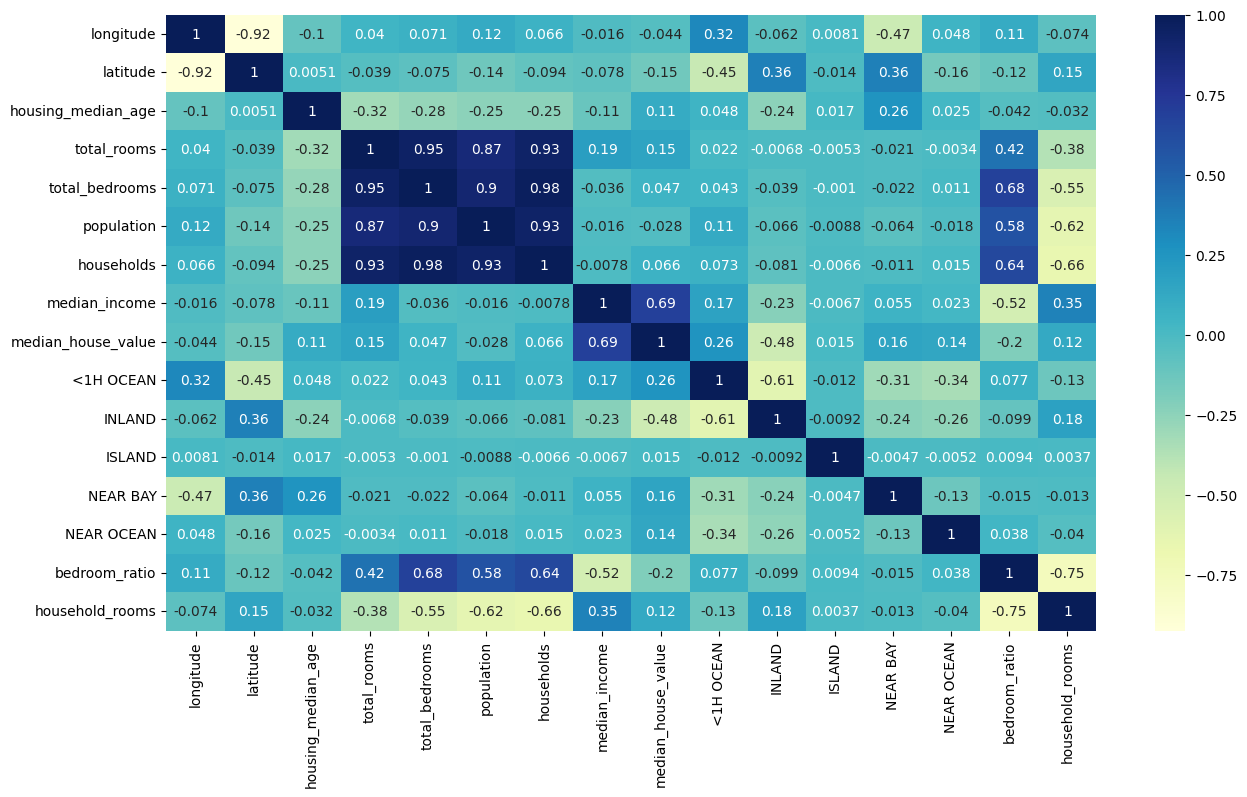

In [94]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

Bedroom ratio has a negative correlation with the target value. The households themselves don't have much of a correlation, but the household rooms does.

total_rooms and bedroom_ratio are interesting, so two new features have been engineered that seem to be important.

---

**Linear Regression Model**

In [95]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [96]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [97]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [98]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18676,-121.90,36.93,22.0,8.893161,7.118016,7.522941,6.725034,5.3276,0,0,0,0,1,0.800392,1.322396
15720,-122.45,37.78,52.0,7.204893,5.676754,6.329721,5.686975,3.7159,0,0,0,1,0,0.787903,1.266911
18821,-120.92,39.56,48.0,7.152269,5.680173,5.883322,4.983607,1.8750,0,1,0,0,0,0.794178,1.435159
6918,-118.00,33.96,37.0,7.789455,5.780744,6.778785,5.723585,9.1541,1,0,0,0,0,0.742124,1.360940
9860,-121.86,36.60,21.0,8.198364,6.919684,7.593878,6.822197,2.9085,1,0,0,0,0,0.844032,1.201719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,-117.68,34.03,16.0,7.958577,6.505784,7.574045,6.383507,3.0396,0,1,0,0,0,0.817456,1.246741
19589,-120.83,37.58,30.0,7.331715,5.549076,6.630683,5.484797,3.6629,0,1,0,0,0,0.756859,1.336734
8148,-118.08,33.81,20.0,8.747670,6.843750,7.737616,6.774224,7.6084,1,0,0,0,0,0.782351,1.291317
12455,-114.61,33.62,16.0,7.080026,5.568345,7.017506,5.493061,2.1759,0,1,0,0,0,0.786486,1.288904


In [99]:
reg.score(X_test, y_test)

0.6762263332195855

---

**Random Forest Model**